In [10]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('Space_Mission.csv')

df.head()

,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success


In [12]:
#data preparation and  cleaning
#renaming columns
df.columns = ['Index', 'Company Name', 'Location', 'Datum', 'Detail', 
              'Status Rocket', 'Rocket', 'Status Mission']

#converting 'Datum' column to datetime format
df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')

#year from the 'Datum' column
df['Year'] = df['Datum'].dt.year


#droping missing rows
df.dropna(inplace=True)

#removing duplicates
df.drop_duplicates(inplace=True)

df.head()



,Index,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Year
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success,2020.0
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020.0
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success,2020.0
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145,Success,2020.0
5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020.0


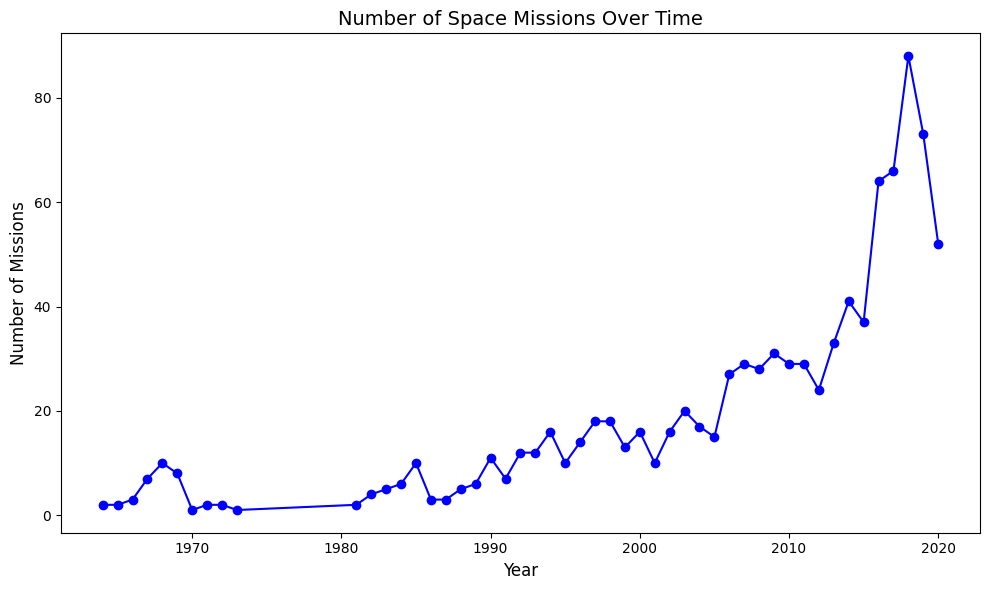

In [13]:
#plot missions over time
#group by year 
missions_per_year = df.groupby('Year').size()
plt.figure(figsize=(10, 6))
plt.plot(missions_per_year.index, missions_per_year.values, marker='o', linestyle='-', color='blue')
plt.title("Number of Space Missions Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Missions", fontsize=12)
plt.grid(visible=False)  
plt.tight_layout()
plt.show()


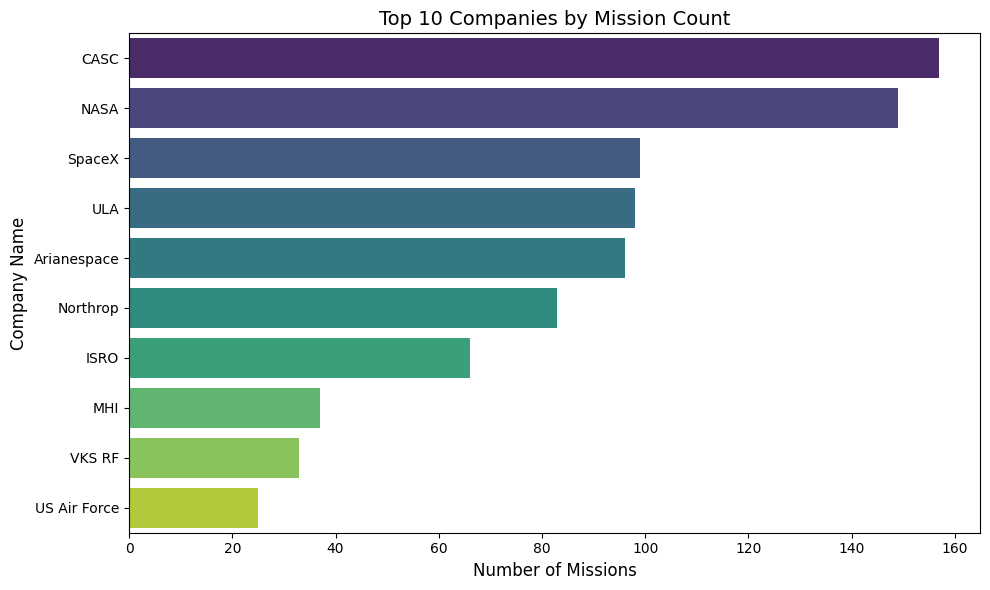

In [14]:
#top 10 companies by number of missions
top_companies = df['Company Name'].value_counts().head(10)
top_companies_df = top_companies.reset_index()
top_companies_df.columns = ['Company Name', 'Missions']
plt.figure(figsize=(10, 6))
sns.barplot(data=top_companies_df, x="Missions", y="Company Name", palette="viridis", hue="Company Name", dodge=False, legend=False)
plt.title("Top 10 Companies by Mission Count", fontsize=14)
plt.xlabel("Number of Missions", fontsize=12)
plt.ylabel("Company Name", fontsize=12)
plt.tight_layout()
plt.show()

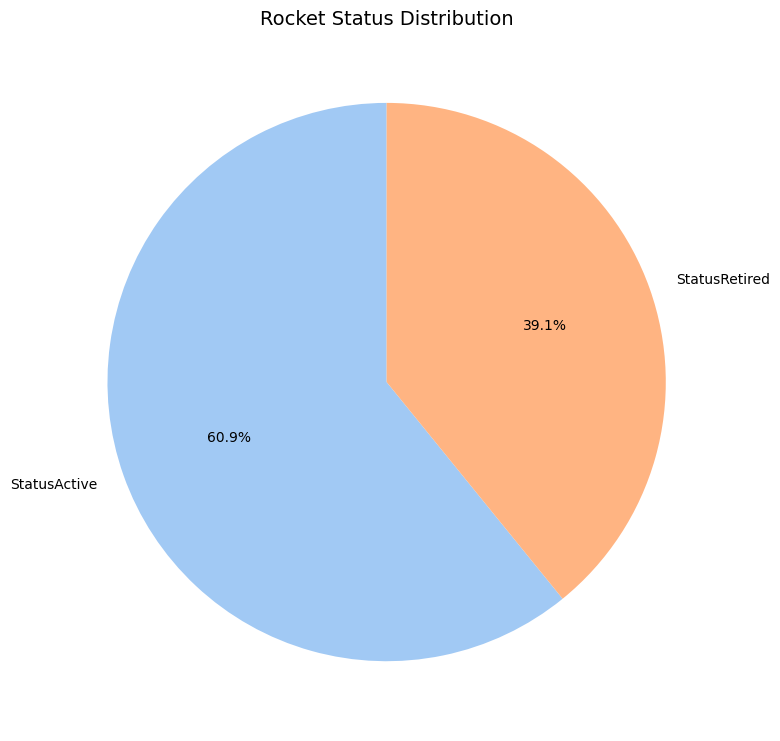

In [15]:
#pie chart for rocket status distribution
rocket_status = df['Status Rocket'].value_counts()
plt.figure(figsize=(8, 8))
rocket_status.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Rocket Status Distribution", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()

In [16]:
#summary statistics by group with Company Name
summary = df.groupby('Company Name').agg({
    'Status Mission': 'count',
    'Rocket': 'nunique'
}).rename(columns={'Status Mission': 'Total Missions', 'Rocket': 'Unique Rockets'})

#top 10 companies
summary = summary.sort_values(by='Total Missions', ascending=False).head(5)
print(summary)


              Total Missions  Unique Rockets
Company Name                                
CASC                     157               8
NASA                     149               2
SpaceX                    99               6
ULA                       98              10
Arianespace               96               5
